In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd

In [2]:
dir = "/Users/akterminsprove/Desktop/DTU/Kandidat - Business Analytics/3. Semester/COMPSCI 285-001 Deep Reinforcement Learning/homework_fall2022/hw5/data/"

In [3]:

from tensorflow.python.summary.summary_iterator import summary_iterator

def get_from_logfile(dir, path, labels, tags):
        
    returns = np.empty((100000,len(tags)))
    returns[:] = np.nan
    idx_step = 0
    it = 0
    
    for event in summary_iterator(dir+path):

        for value in event.summary.value:

            if value.tag in tags:
                idx = tags.index(value.tag)
                #print(value.tag )
                returns[idx_step, idx] = value.simple_value

                if idx == 0 and it!=0:
                    idx_step +=1
                    #print(idx_step)
            it += 1

    return pd.DataFrame(returns, columns = labels).dropna(subset=[labels[0]])

## PROBLEM 1

### PART 1

In [4]:
paths = ["hw5_expl_q1_env1_random_PointmassEasy-v0_16-11-2022_09-59-16/events.out.tfevents.1668621556.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q1_env1_rnd_PointmassEasy-v0_16-11-2022_09-59-16/events.out.tfevents.1668621556.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q1_env2_random_PointmassMedium-v0_16-11-2022_09-59-16/events.out.tfevents.1668621556.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q1_env2_rnd_PointmassMedium-v0_16-11-2022_09-59-16/events.out.tfevents.1668621556.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
names= ['PointmassEasy Random','PointmassEasy RND','PointmassMedium Random','PointmassMedium RND']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {names[num]}',f'Train Average Return {names[num]}',f'Eval Average Return {names[num]}' ]
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [5]:
df_all.head(3)

,EnvStepSoFar PointmassEasy Random,Train Average Return PointmassEasy Random,Eval Average Return PointmassEasy Random,EnvStepSoFar PointmassEasy RND,Train Average Return PointmassEasy RND,Eval Average Return PointmassEasy RND,EnvStepSoFar PointmassMedium Random,Train Average Return PointmassMedium Random,Eval Average Return PointmassMedium Random,EnvStepSoFar PointmassMedium RND,Train Average Return PointmassMedium RND,Eval Average Return PointmassMedium RND
0,1001.0,NaN,-49.380951,1001.0,NaN,-49.380951,1001.0,NaN,-150.0,1001.0,NaN,-150.0
1,2001.0,-50.00,-50.000000,2001.0,-50.0,-50.000000,2001.0,-150.0,-150.0,2001.0,-138.571426,-150.0
2,3001.0,-49.25,-50.000000,3001.0,-50.0,-50.000000,3001.0,-150.0,-150.0,3001.0,-141.357147,-150.0


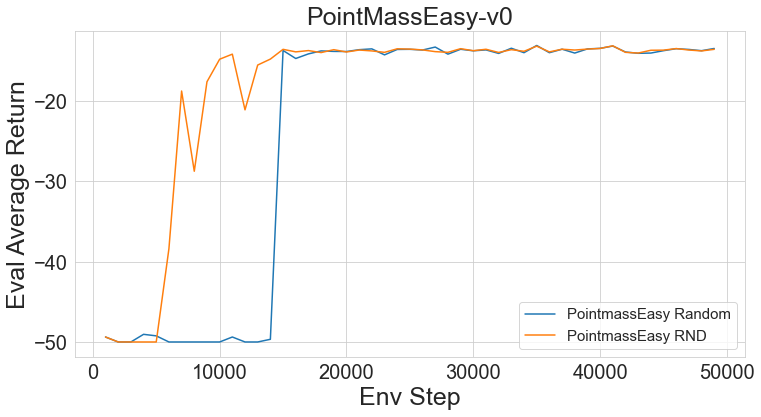

In [6]:
index = df_all['EnvStepSoFar PointmassEasy Random']

fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names[:2]):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Env Step', size=25)
ax.set_ylabel('Eval Average Return', size=25)
ax.set_title('PointMassEasy-v0', size=25);

plt.savefig('plots/Q1_1_easy.png')

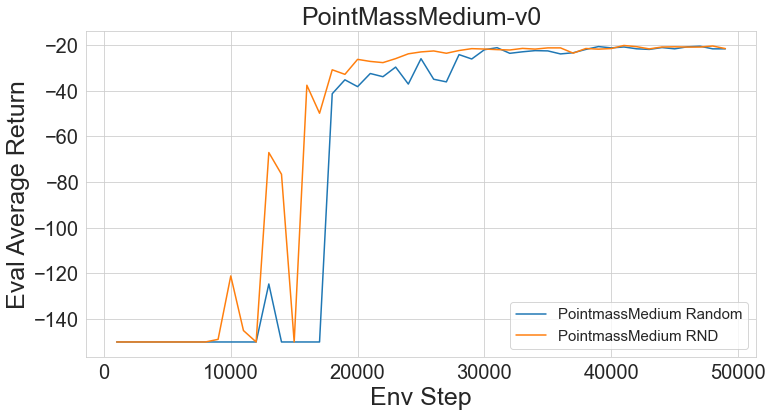

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names[2:]):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Env Step', size=25)
ax.set_ylabel('Eval Average Return', size=25)
ax.set_title('PointMassMedium-v0', size=25);

plt.savefig('plots/Q1_1_medium.png')

### PART 2

In [8]:
paths = ["hw5_expl_q1_env1_random_PointmassEasy-v0_16-11-2022_09-59-16/events.out.tfevents.1668621556.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q1_env1_rnd_PointmassEasy-v0_16-11-2022_09-59-16/events.out.tfevents.1668621556.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q1_alg_easy_PointmassEasy-v0_18-11-2022_15-08-17/events.out.tfevents.1668812897.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q1_env2_random_PointmassMedium-v0_16-11-2022_09-59-16/events.out.tfevents.1668621556.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q1_env2_rnd_PointmassMedium-v0_16-11-2022_09-59-16/events.out.tfevents.1668621556.Ann-katrine-christiansens-MacBook-Air-4.local",
         "hw5_expl_q1_alg_med_PointmassMedium-v0_18-11-2022_14-33-26/events.out.tfevents.1668810806.Ann-katrine-christiansens-MacBook-Air-4.local"]


tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
names= names= ['PointmassEasy Random','PointmassEasy RND','PointmassEasy Boltzmann','PointmassMedium Random','PointmassMedium RND','PointmassMedium Boltzmann']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {names[num]}',f'Train Average Return {names[num]}',f'Eval Average Return {names[num]}' ]
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

In [9]:
df_all.head(3)

,EnvStepSoFar PointmassEasy Random,Train Average Return PointmassEasy Random,Eval Average Return PointmassEasy Random,EnvStepSoFar PointmassEasy RND,Train Average Return PointmassEasy RND,Eval Average Return PointmassEasy RND,EnvStepSoFar PointmassEasy Boltzmann,Train Average Return PointmassEasy Boltzmann,Eval Average Return PointmassEasy Boltzmann,EnvStepSoFar PointmassMedium Random,Train Average Return PointmassMedium Random,Eval Average Return PointmassMedium Random,EnvStepSoFar PointmassMedium RND,Train Average Return PointmassMedium RND,Eval Average Return PointmassMedium RND,EnvStepSoFar PointmassMedium Boltzmann,Train Average Return PointmassMedium Boltzmann,Eval Average Return PointmassMedium Boltzmann
0,1001.0,NaN,-49.380951,1001.0,NaN,-49.380951,1001.0,NaN,-49.380951,1001.0,NaN,-150.0,1001.0,NaN,-150.0,1001.0,NaN,-150.0
1,2001.0,-50.00,-50.000000,2001.0,-50.0,-50.000000,2001.0,-50.0,-50.000000,2001.0,-150.0,-150.0,2001.0,-138.571426,-150.0,2001.0,-139.857147,-150.0
2,3001.0,-49.25,-50.000000,3001.0,-50.0,-50.000000,3001.0,-50.0,-50.000000,3001.0,-150.0,-150.0,3001.0,-141.357147,-150.0,3001.0,-144.538467,-150.0


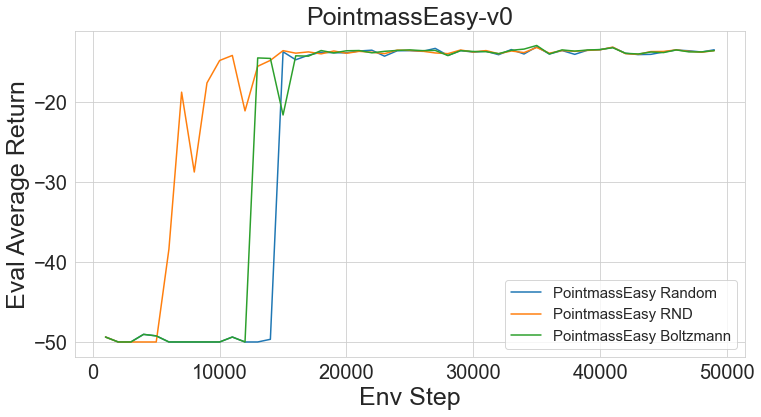

In [10]:
index = df_all['EnvStepSoFar PointmassEasy Boltzmann']

fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names[:3]):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Env Step', size=25)
ax.set_ylabel('Eval Average Return', size=25)
ax.set_title(f'PointmassEasy-v0', size=25);

plt.savefig(f'plots/Q1_2_easy.png')

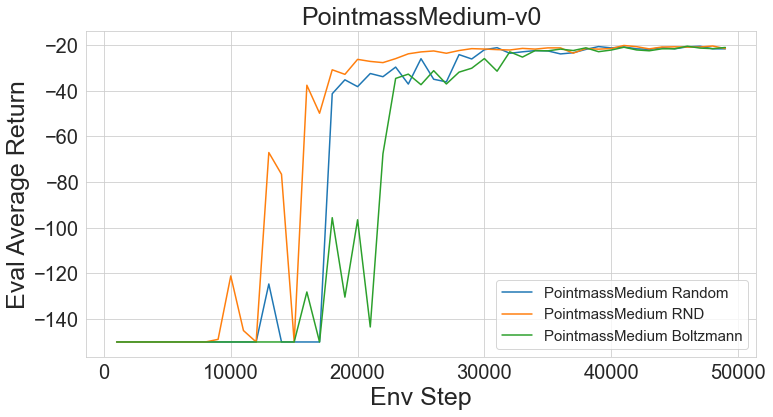

In [11]:
index = df_all['EnvStepSoFar PointmassEasy Boltzmann']

fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names[3:]):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Env Step', size=25)
ax.set_ylabel('Eval Average Return', size=25)
ax.set_title(f'PointmassMedium-v0', size=25);

plt.savefig(f'plots/Q1_2_medium.png')

## PROBLEM 2: 

### PART 1: 

In [12]:
paths = ["hw5_expl_q2_dqn_PointmassMedium-v0_16-11-2022_11-05-53/events.out.tfevents.1668625553.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_cql_PointmassMedium-v0_16-11-2022_11-05-53/events.out.tfevents.1668625553.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_cql_shift1_scale100_PointmassMedium-v0_14-11-2022_15-35-10/events.out.tfevents.1668468910.Ann-katrine-christiansens-MacBook-Air-4.local"]
       # "hw5_expl_q2_cql_shift1_scale100_PointmassMedium-v0_16-11-2022_11-05-53/events.out.tfevents.1668625553.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
names= ['DQN','CQL','CQL: shift = 1 & scale = 100']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {names[num]}',f'Train Average Return {names[num]}',f'Eval Average Return {names[num]}' ]
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

In [13]:
df_all.head(3)

,EnvStepSoFar DQN,Train Average Return DQN,Eval Average Return DQN,EnvStepSoFar CQL,Train Average Return CQL,Eval Average Return CQL,EnvStepSoFar CQL: shift = 1 & scale = 100,Train Average Return CQL: shift = 1 & scale = 100,Eval Average Return CQL: shift = 1 & scale = 100
0,1001.0,NaN,-150.0,1001.0,NaN,-150.0,1001.0,NaN,-150.0
1,2001.0,-130.857147,-150.0,2001.0,-131.000000,-150.0,2001.0,-150.0,-150.0
2,3001.0,-139.714279,-150.0,3001.0,-140.357147,-150.0,3001.0,-150.0,-150.0


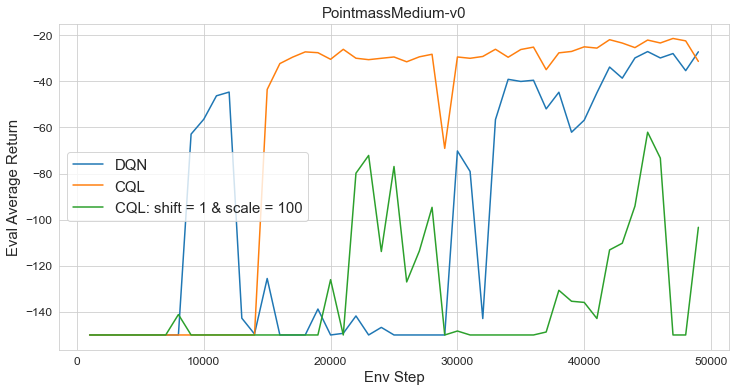

In [14]:
index = df_all['EnvStepSoFar DQN']

fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Env Step', size=15)
ax.set_ylabel('Eval Average Return', size=15)
ax.set_title('PointmassMedium-v0', size=15);

plt.savefig(f'plots/Q2_1.png')

### PART 2

In [15]:
paths = ["hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_18-11-2022_15-42-45/events.out.tfevents.1668814965.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_cql_PointmassMedium-v0_16-11-2022_11-05-53/events.out.tfevents.1668625553.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_18-11-2022_15-42-46/events.out.tfevents.1668814966.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_dqn_numsteps_5000_PointmassMedium-v0_18-11-2022_15-42-45/events.out.tfevents.1668814965.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_dqn_PointmassMedium-v0_16-11-2022_11-05-53/events.out.tfevents.1668625553.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_dqn_numsteps_15000_PointmassMedium-v0_18-11-2022_15-42-45/events.out.tfevents.1668814965.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
names= ['CQL: Steps 5000','CQL: Steps 10000','CQL: Steps 15000','DQN: Steps 5000','DQN: Steps 10000','DQN: Steps 15000']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {names[num]}',f'Train Average Return {names[num]}',f'Eval Average Return {names[num]}' ]
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

In [16]:
df_all.head(3)

,EnvStepSoFar CQL: Steps 5000,Train Average Return CQL: Steps 5000,Eval Average Return CQL: Steps 5000,EnvStepSoFar CQL: Steps 10000,Train Average Return CQL: Steps 10000,Eval Average Return CQL: Steps 10000,EnvStepSoFar CQL: Steps 15000,Train Average Return CQL: Steps 15000,Eval Average Return CQL: Steps 15000,EnvStepSoFar DQN: Steps 5000,Train Average Return DQN: Steps 5000,Eval Average Return DQN: Steps 5000,EnvStepSoFar DQN: Steps 10000,Train Average Return DQN: Steps 10000,Eval Average Return DQN: Steps 10000,EnvStepSoFar DQN: Steps 15000,Train Average Return DQN: Steps 15000,Eval Average Return DQN: Steps 15000
0,1001.0,NaN,-150.0,1001.0,NaN,-150.0,1001.0,NaN,-150.0,1001.0,NaN,-150.0,1001.0,NaN,-150.0,1001.0,NaN,-150.0
1,2001.0,-150.000000,-150.0,2001.0,-131.000000,-150.0,2001.0,-150.0,-150.0,2001.0,-150.000000,-150.0,2001.0,-130.857147,-150.0,2001.0,-150.000000,-150.0
2,3001.0,-147.846161,-150.0,3001.0,-140.357147,-150.0,3001.0,-150.0,-150.0,3001.0,-148.769226,-150.0,3001.0,-139.714279,-150.0,3001.0,-148.692307,-150.0


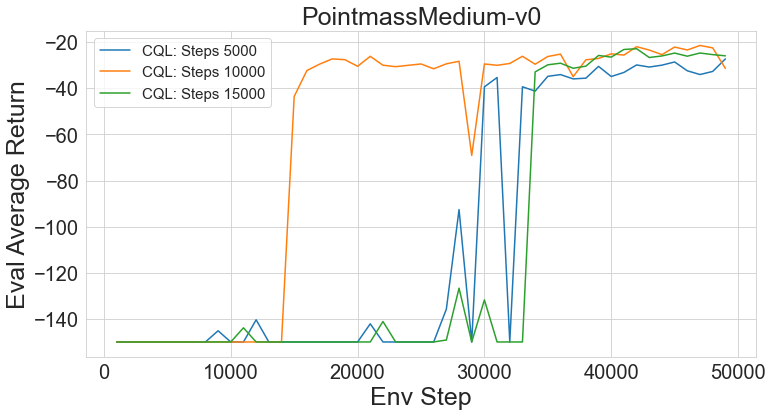

In [17]:
index = df_all['EnvStepSoFar CQL: Steps 5000']



fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names[:3]):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Env Step', size=25)
ax.set_ylabel('Eval Average Return', size=25)
ax.set_title('PointmassMedium-v0', size=25);

plt.savefig(f'plots/Q2_2_CQL.png')

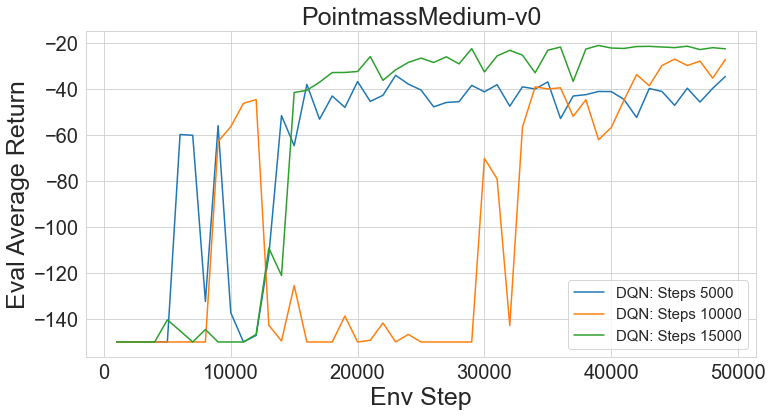

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names[3:]):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Env Step', size=25)
ax.set_ylabel('Eval Average Return', size=25)
ax.set_title('PointmassMedium-v0', size=25);

plt.savefig(f'plots/Q2_2_DQN.png')

### PART 3

In [19]:
paths = ["hw5_expl_q2_alpha_0.02_PointmassMedium-v0_16-11-2022_14-00-13/events.out.tfevents.1668636013.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_cql_PointmassMedium-v0_16-11-2022_11-05-53/events.out.tfevents.1668625553.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q2_alpha_0.5_PointmassMedium-v0_16-11-2022_15-12-57/events.out.tfevents.1668640377.Ann-katrine-christiansens-MacBook-Air-4.local"]


tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
names= ['alpha = 0.02','alpha = 0.1','alpha = 0.5']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {names[num]}',f'Train Average Return {names[num]}',f'Eval Average Return {names[num]}' ]
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

In [20]:
df_all.head(3)

,EnvStepSoFar alpha = 0.02,Train Average Return alpha = 0.02,Eval Average Return alpha = 0.02,EnvStepSoFar alpha = 0.1,Train Average Return alpha = 0.1,Eval Average Return alpha = 0.1,EnvStepSoFar alpha = 0.5,Train Average Return alpha = 0.5,Eval Average Return alpha = 0.5
0,1001.0,NaN,-150.0,1001.0,NaN,-150.0,1001.0,NaN,-150.0
1,2001.0,-138.714279,-150.0,2001.0,-131.000000,-150.0,2001.0,-142.428574,-150.0
2,3001.0,-139.785721,-150.0,3001.0,-140.357147,-150.0,3001.0,-145.923080,-150.0


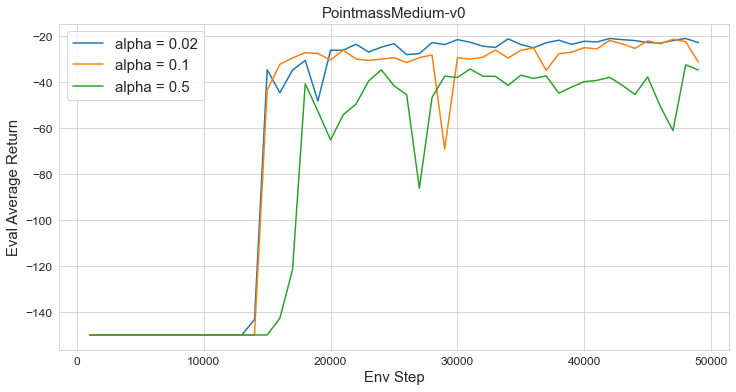

In [21]:
index = df_all['EnvStepSoFar alpha = 0.02']

fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Env Step', size=15)
ax.set_ylabel('Eval Average Return', size=15)
ax.set_title('PointmassMedium-v0', size=15);

plt.savefig(f'plots/Q2_3.png')

## PROBLEM 3

In [22]:
paths = [#"hw5_expl_q3_medium_cql_PointmassMedium-v0_16-11-2022_14-26-24/events.out.tfevents.1668637584.Ann-katrine-christiansens-MacBook-Air-4.local", 
        "hw5_expl_q3_medium_cql_PointmassMedium-v0_20-11-2022_11-00-12/events.out.tfevents.1668970812.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q3_medium_dqn_PointmassMedium-v0_16-11-2022_14-26-24/events.out.tfevents.1668637584.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q3_hard_cql_PointmassHard-v0_16-11-2022_14-26-24/events.out.tfevents.1668637584.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q3_hard_dqn_PointmassHard-v0_16-11-2022_14-26-24/events.out.tfevents.1668637584.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
names= ['PointmassMedium CQL','PointmassMedium DQN', 'PointmassHard CQL', 'PointmassHard DQN']
name_ = ['CQL','DQN']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {names[num]}',f'Train Average Return {names[num]}',f'Eval Average Return {names[num]}' ]
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

In [23]:
df_all.head(3)

,EnvStepSoFar PointmassMedium CQL,Train Average Return PointmassMedium CQL,Eval Average Return PointmassMedium CQL,EnvStepSoFar PointmassMedium DQN,Train Average Return PointmassMedium DQN,Eval Average Return PointmassMedium DQN,EnvStepSoFar PointmassHard CQL,Train Average Return PointmassHard CQL,Eval Average Return PointmassHard CQL,EnvStepSoFar PointmassHard DQN,Train Average Return PointmassHard DQN,Eval Average Return PointmassHard DQN
0,1001.0,NaN,-150.0,1001.0,NaN,-150.0,1001.0,NaN,-100.0,1001.0,NaN,-100.0
1,2001.0,-145.333328,-150.0,2001.0,-146.833328,-150.0,2001.0,-100.0,-100.0,2001.0,-100.0,-100.0
2,3001.0,-147.846161,-150.0,3001.0,-148.538467,-150.0,3001.0,-100.0,-100.0,3001.0,-100.0,-100.0


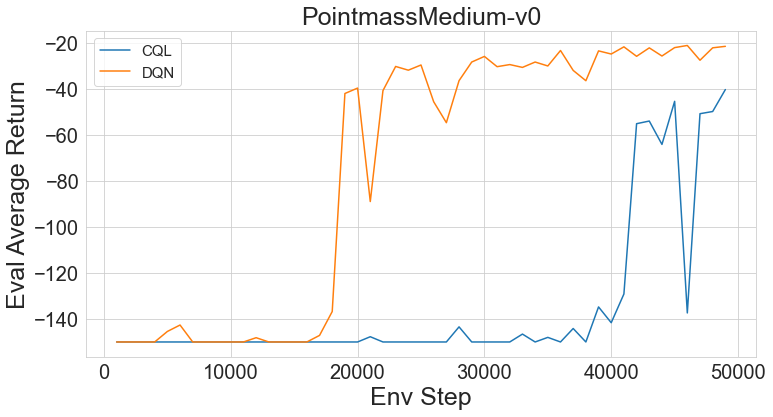

In [24]:
index = df_all['EnvStepSoFar PointmassMedium CQL']



fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names[:2]):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name_[i])

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Env Step', size=25)
ax.set_ylabel('Eval Average Return', size=25)
ax.set_title('PointmassMedium-v0', size=25);

plt.savefig(f'plots/Q3_medium.png')

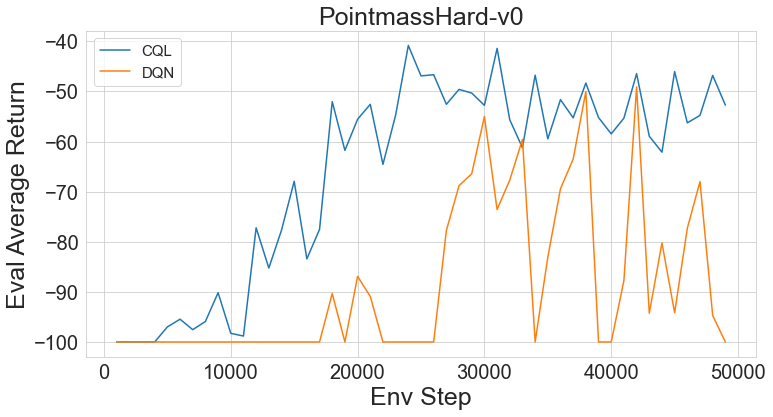

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

for i,name in enumerate(names[2:]):
    ax.plot(index,df_all[f'Eval Average Return {name}'], label = name_[i])

ax.legend(prop={'size': 15})
#ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Env Step', size=25)
ax.set_ylabel('Eval Average Return', size=25)
ax.set_title('PointmassHard-v0', size=25);

plt.savefig(f'plots/Q3_Hard.png')

## PROBLEM 4

In [26]:
def plot_4(paths, title, save_as):
    tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
    names= ['lambda = 0.1','lambda = 1', 'lambda = 2', 'lambda = 10','lambda = 20','lambda = 50']

    for num,path in enumerate(paths):
        labels= [f'EnvStepSoFar {names[num]}',f'Train Average Return {names[num]}',f'Eval Average Return {names[num]}' ]
        df = get_from_logfile(dir, path, labels, tags)

        if num ==0:
            df_all = df.copy()

        else:
            df_all = pd.concat([df_all,df], axis=1)

    index = df_all[f'EnvStepSoFar {names[num]}']

    fig, ax = plt.subplots(figsize=(12,6))

    for i,name in enumerate(names):
        ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

    ax.legend(prop={'size': 15})
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('Env Step', size=25)
    ax.set_ylabel('Eval Average Return', size=25)
    ax.set_title(title, size=25);

    plt.savefig(f'plots/{save_as}.png')

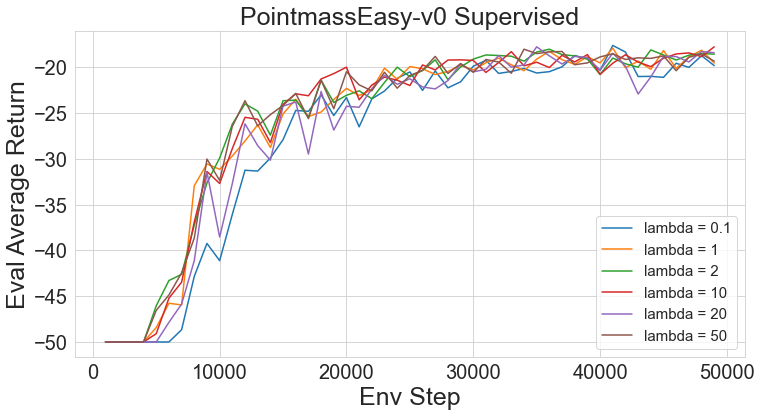

In [27]:
paths = ["hw5_expl_q4_awac_easy_supervised_lam0.1_PointmassEasy-v0_15-11-2022_18-05-27/events.out.tfevents.1668564327.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_supervised_lam1_PointmassEasy-v0_15-11-2022_18-05-26/events.out.tfevents.1668564326.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_supervised_lam2_PointmassEasy-v0_15-11-2022_18-05-30/events.out.tfevents.1668564330.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_supervised_lam10_PointmassEasy-v0_15-11-2022_18-05-26/events.out.tfevents.1668564326.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_supervised_lam20_PointmassEasy-v0_15-11-2022_18-05-25/events.out.tfevents.1668564325.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_supervised_lam50_PointmassEasy-v0_15-11-2022_18-05-24/events.out.tfevents.1668564324.Ann-katrine-christiansens-MacBook-Air-4.local"]


plot_4(paths, "PointmassEasy-v0 Supervised", "Q4_easy_supervised")

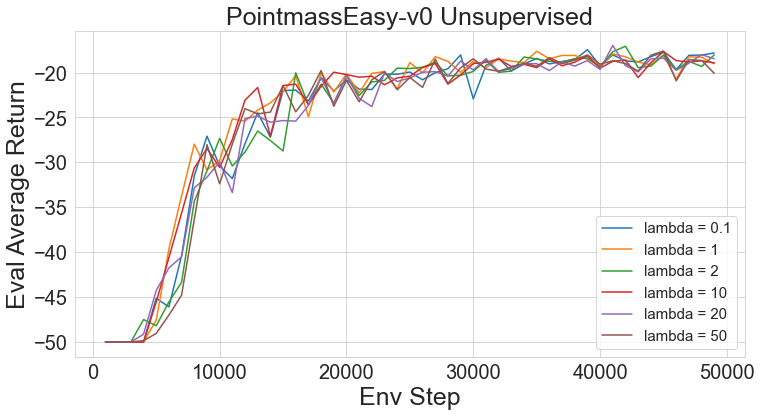

In [28]:
paths = ["hw5_expl_q4_awac_easy_unsupervised_lam0.1_PointmassEasy-v0_15-11-2022_18-05-27/events.out.tfevents.1668564327.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_unsupervised_lam1_PointmassEasy-v0_15-11-2022_18-05-28/events.out.tfevents.1668564328.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_unsupervised_lam2_PointmassEasy-v0_15-11-2022_18-05-25/events.out.tfevents.1668564325.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_unsupervised_lam10_PointmassEasy-v0_15-11-2022_18-05-28/events.out.tfevents.1668564328.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_unsupervised_lam20_PointmassEasy-v0_15-11-2022_18-05-28/events.out.tfevents.1668564328.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_easy_unsupervised_lam50_PointmassEasy-v0_15-11-2022_18-05-25/events.out.tfevents.1668564325.Ann-katrine-christiansens-MacBook-Air-4.local"]


plot_4(paths, "PointmassEasy-v0 Unsupervised", "Q4_easy_unsupervised")

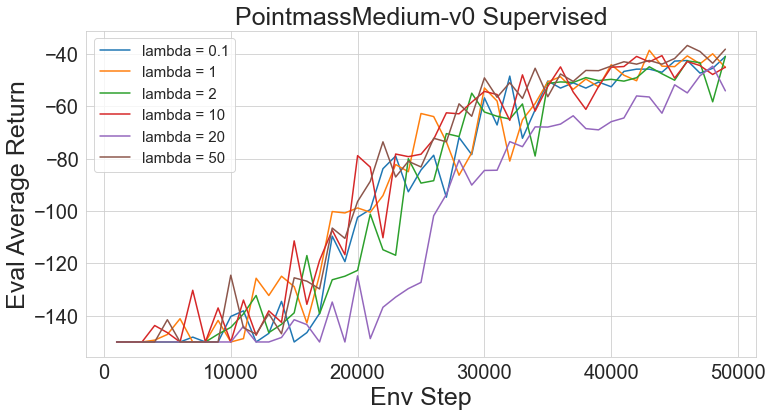

In [29]:
paths = ["hw5_expl_q4_awac_medium_supervised_lam0.1_PointmassMedium-v0_15-11-2022_18-05-28/events.out.tfevents.1668564328.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_supervised_lam1_PointmassMedium-v0_15-11-2022_18-05-24/events.out.tfevents.1668564324.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_supervised_lam2_PointmassMedium-v0_15-11-2022_18-05-29/events.out.tfevents.1668564329.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_supervised_lam10_PointmassMedium-v0_15-11-2022_18-05-24/events.out.tfevents.1668564324.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_supervised_lam20_PointmassMedium-v0_15-11-2022_18-05-24/events.out.tfevents.1668564324.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_supervised_lam50_PointmassMedium-v0_15-11-2022_18-05-26/events.out.tfevents.1668564326.Ann-katrine-christiansens-MacBook-Air-4.local"]


plot_4(paths, "PointmassMedium-v0 Supervised", "Q4_medium_supervised")

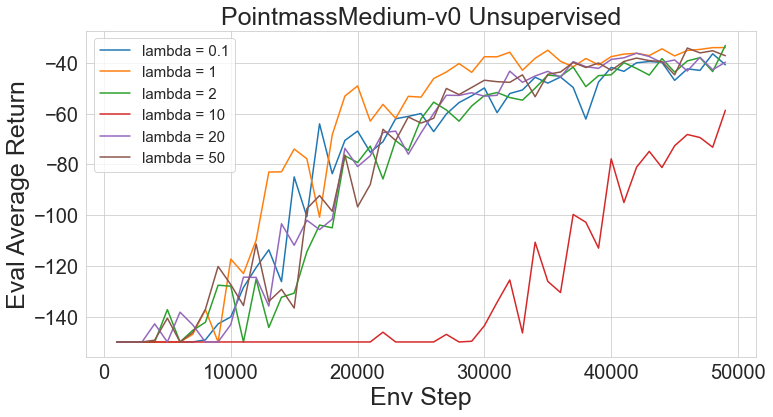

In [30]:
paths = ["hw5_expl_q4_awac_medium_unsupervised_lam0.1_PointmassMedium-v0_15-11-2022_18-05-27/events.out.tfevents.1668564327.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_unsupervised_lam1_PointmassMedium-v0_15-11-2022_18-05-30/events.out.tfevents.1668564330.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_unsupervised_lam2_PointmassMedium-v0_15-11-2022_18-05-26/events.out.tfevents.1668564326.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_unsupervised_lam10_PointmassMedium-v0_15-11-2022_18-05-29/events.out.tfevents.1668564329.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_unsupervised_lam20_PointmassMedium-v0_15-11-2022_18-05-29/events.out.tfevents.1668564329.Ann-katrine-christiansens-MacBook-Air-4.local",
        "hw5_expl_q4_awac_medium_unsupervised_lam50_PointmassMedium-v0_15-11-2022_18-05-24/events.out.tfevents.1668564324.Ann-katrine-christiansens-MacBook-Air-4.local"
        ]


plot_4(paths, "PointmassMedium-v0 Unsupervised", "Q4_medium_unsupervised")

## PROBLEM 5

In [31]:
import os
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q5_" in path and "events" in name)]
files = sorted(files)
clean_files = [file[147:] for file in files]

In [32]:
def plot_5(paths, title, save_as):
    tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn','Eval_AverageReturn']
    names= np.array(['expectile = 0.5','expectile = 0.6', 'expectile = 0.7', 'expectile = 0.8','expectile = 0.95','expectile = 0.99','expectile = 0.9'])
    
    new_names = names[names.argsort()]
    paths = paths[names.argsort()]


    for num,path in enumerate(paths):
        labels= [f'EnvStepSoFar {new_names[num]}',f'Train Average Return {new_names[num]}',f'Eval Average Return {new_names[num]}' ]
        df = get_from_logfile(dir, path, labels, tags)

        if num ==0:
            df_all = df.copy()

        else:
            df_all = pd.concat([df_all,df], axis=1)

    index = df_all[f'EnvStepSoFar {new_names[num]}']

    fig, ax = plt.subplots(figsize=(12,6))

    for i,name in enumerate(new_names):
        ax.plot(index,df_all[f'Eval Average Return {name}'], label = name)

    ax.legend(prop={'size': 15})
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('Env Step', size=25)
    ax.set_ylabel('Eval Average Return', size=25)
    ax.set_title(title, size=25);

    plt.savefig(f'plots/{save_as}.png')

In [33]:
clean_files[:7]

['hw5_expl_q5_iql_easy_supervised_lam10_tau0.5_PointmassEasy-v0_18-11-2022_18-39-39/events.out.tfevents.1668825579.Ann-katrine-christiansens-MacBook-Air-4.local',
 'hw5_expl_q5_iql_easy_supervised_lam10_tau0.6_PointmassEasy-v0_18-11-2022_18-39-47/events.out.tfevents.1668825587.Ann-katrine-christiansens-MacBook-Air-4.local',
 'hw5_expl_q5_iql_easy_supervised_lam10_tau0.7_PointmassEasy-v0_18-11-2022_18-39-42/events.out.tfevents.1668825582.Ann-katrine-christiansens-MacBook-Air-4.local',
 'hw5_expl_q5_iql_easy_supervised_lam10_tau0.8_PointmassEasy-v0_18-11-2022_18-39-47/events.out.tfevents.1668825587.Ann-katrine-christiansens-MacBook-Air-4.local',
 'hw5_expl_q5_iql_easy_supervised_lam10_tau0.95_PointmassEasy-v0_18-11-2022_18-39-40/events.out.tfevents.1668825580.Ann-katrine-christiansens-MacBook-Air-4.local',
 'hw5_expl_q5_iql_easy_supervised_lam10_tau0.99_PointmassEasy-v0_18-11-2022_18-39-44/events.out.tfevents.1668825584.Ann-katrine-christiansens-MacBook-Air-4.local',
 'hw5_expl_q5_iql_ea

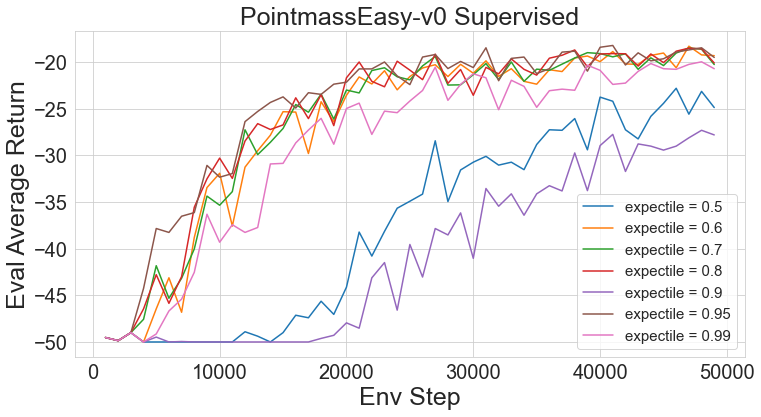

In [34]:
plot_5(np.array(clean_files[:7]), "PointmassEasy-v0 Supervised", "Q5_easy_supervised")

In [35]:
np.array(clean_files[14:21])

array(['hw5_expl_q5_iql_medium_supervised_lam50_tau0.5_PointmassMedium-v0_18-11-2022_18-39-43/events.out.tfevents.1668825583.Ann-katrine-christiansens-MacBook-Air-4.local',
       'hw5_expl_q5_iql_medium_supervised_lam50_tau0.6_PointmassMedium-v0_18-11-2022_18-39-41/events.out.tfevents.1668825581.Ann-katrine-christiansens-MacBook-Air-4.local',
       'hw5_expl_q5_iql_medium_supervised_lam50_tau0.7_PointmassMedium-v0_18-11-2022_18-39-40/events.out.tfevents.1668825580.Ann-katrine-christiansens-MacBook-Air-4.local',
       'hw5_expl_q5_iql_medium_supervised_lam50_tau0.8_PointmassMedium-v0_18-11-2022_18-39-42/events.out.tfevents.1668825582.Ann-katrine-christiansens-MacBook-Air-4.local',
       'hw5_expl_q5_iql_medium_supervised_lam50_tau0.95_PointmassMedium-v0_18-11-2022_18-39-44/events.out.tfevents.1668825584.Ann-katrine-christiansens-MacBook-Air-4.local',
       'hw5_expl_q5_iql_medium_supervised_lam50_tau0.99_PointmassMedium-v0_18-11-2022_18-39-41/events.out.tfevents.1668825581.Ann-katr

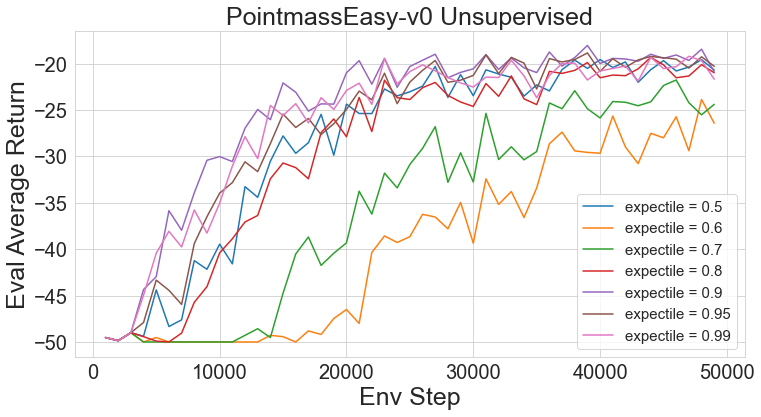

In [36]:
plot_5(np.array(clean_files[7:14]), "PointmassEasy-v0 Unsupervised", "Q5_easy_unsupervised")

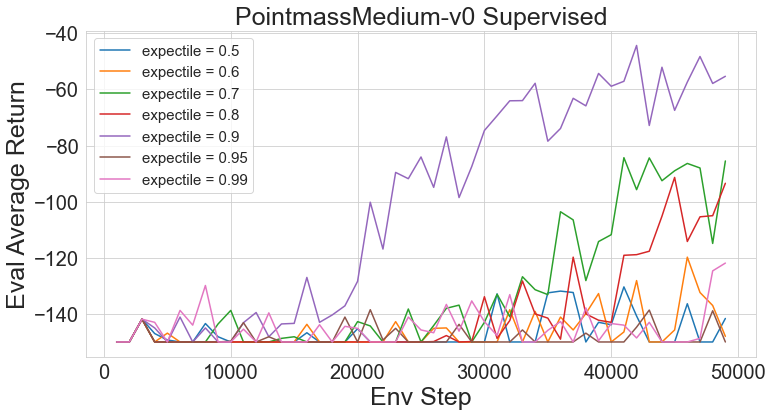

In [37]:
plot_5(np.array(clean_files[14:21]), "PointmassMedium-v0 Supervised", "Q5_medium_supervised")

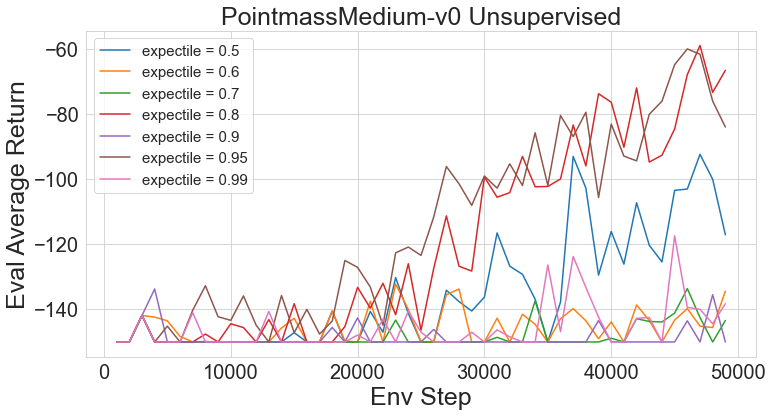

In [38]:
plot_5(np.array(clean_files[21:]), "PointmassMedium-v0 Unsupervised", "Q5_medium_unsupervised")